In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input , Dense 
from keras.models import Model

In [5]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", 
    names=[
    "Age_of_patient",
    "year_of_operation",
    "positive_axillary_nodes",
    "Survival_status",
    ]
)

In [6]:
data.head()

,Age_of_patient,year_of_operation,positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
data.shape

(306, 4)

In [9]:
X = data.drop("Survival_status" , axis = 1)
y = data["Survival_status"]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [13]:
feature_count = X.shape[1]
input_count = Input(shape=(feature_count ,))

bottleneck_shape = 2

In [15]:
encoder = Dense(3 , activation="relu")(input_count)
encoder = Dense(3 , activation="relu")(input_count)
encoder = Dense(bottleneck_shape , activation="relu")(encoder)

decoder = Dense(3 , activation="relu")(encoder)
decoder = Dense(feature_count , activation="sigmoid")(encoder)

auto_encoder = Model(inputs = input_count , outputs = decoder)

In [17]:
auto_encoder.compile(
    loss = "mse",
    optimizer = "adam"
)

In [19]:
history = auto_encoder.fit(
    X,
    X,
    epochs = 100,
    batch_size= 16,
    verbose = 2,
    validation_split=0.2
)

Epoch 1/100
16/16 - 1s - loss: 0.1100 - val_loss: 0.1216 - 1s/epoch - 92ms/step
Epoch 2/100
16/16 - 0s - loss: 0.1078 - val_loss: 0.1203 - 64ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.1060 - val_loss: 0.1191 - 73ms/epoch - 5ms/step
Epoch 4/100
16/16 - 0s - loss: 0.1044 - val_loss: 0.1181 - 86ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 0.1028 - val_loss: 0.1174 - 74ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 0.1014 - val_loss: 0.1168 - 214ms/epoch - 13ms/step
Epoch 7/100
16/16 - 0s - loss: 0.1000 - val_loss: 0.1162 - 105ms/epoch - 7ms/step
Epoch 8/100
16/16 - 0s - loss: 0.0986 - val_loss: 0.1156 - 121ms/epoch - 8ms/step
Epoch 9/100
16/16 - 0s - loss: 0.0972 - val_loss: 0.1151 - 102ms/epoch - 6ms/step
Epoch 10/100
16/16 - 0s - loss: 0.0959 - val_loss: 0.1146 - 92ms/epoch - 6ms/step
Epoch 11/100
16/16 - 0s - loss: 0.0946 - val_loss: 0.1141 - 91ms/epoch - 6ms/step
Epoch 12/100
16/16 - 0s - loss: 0.0934 - val_loss: 0.1137 - 93ms/epoch - 6ms/step
Epoch 13/100
16/16 - 

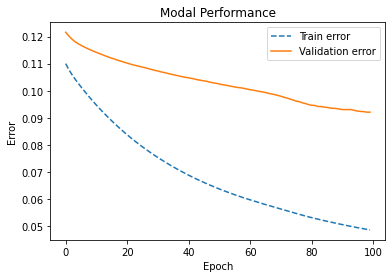

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Modal Performance")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.legend(["Train error", "Validation error"], loc = "upper right")
plt.show()

10/10 [==============================] - 0s 2ms/step


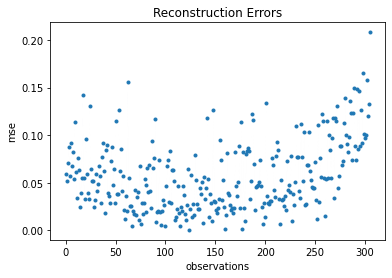

In [32]:
estimates = auto_encoder.predict(X)
mse = np.mean(np.power(X - estimates , 2 ) , axis = 1)

plt.plot(mse , linewidth =0.001 , marker=".")
plt.title("Reconstruction Errors")
plt.ylabel("mse")
plt.xlabel("observations")
plt.show()

In [40]:
threshold = 0.14
print("Threshold value : " , threshold)

Threshold value :  0.14


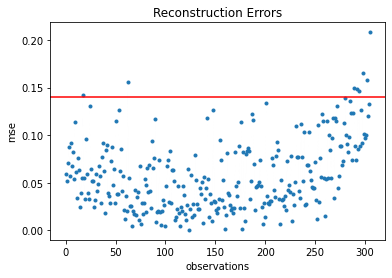

In [41]:
plt.plot(mse , linewidth =0.001 , marker=".")
plt.axhline(y = threshold , color="r")
plt.title("Reconstruction Errors")
plt.ylabel("mse")
plt.xlabel("observations")
plt.show()

In [42]:
anomaly = pd.DataFrame(data[mse > threshold])
print("Anomaluy count : " ,anomaly.shape[0])

Anomaluy count :  8


In [44]:
print("anomaly values : \n" ,anomaly)

anomaly values : 
      Age_of_patient  year_of_operation  positive_axillary_nodes  \
17               36                 69                        0   
62               43                 58                       52   
289              70                 68                        0   
292              71                 68                        2   
294              72                 58                        0   
298              73                 68                        0   
302              76                 67                        0   
305              83                 58                        2   

     Survival_status  
17                 1  
62                 2  
289                1  
292                1  
294                1  
298                1  
302                1  
305                2  


In [47]:
no_anomaly = pd.DataFrame(data[mse <= threshold])
print("old data" , data.shape)
print("new data" , no_anomaly.shape)

old data (306, 4)
new data (298, 4)
